# Week 2 Building Types - Han Zhang

---

### Summary
This notebook examines how the building composition in the Chicago Energy benchmarking dataset changes over the years.

In [6]:
# Standard library imports
import sys

import matplotlib.pyplot as plt

# Third-party imports
import seaborn as sns

# Add utils folder to Python path
sys.path.append("../utils")

# Local application imports
from data import merge_all_years

# Load in the data
energy_df = merge_all_years()

energy_df.head()

Reading Chicago_Energy_Benchmarking_-_2014_Data_Reported_in_2015_20251002.csv (Year: 2014)...
Reading Chicago_Energy_Benchmarking_-_2015_Data_Reported_in_2016_20251002.csv (Year: 2015)...
Reading Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017_20251007.csv (Year: 2016)...
Reading Chicago_Energy_Benchmarking_-_2017_Data_Reported_in_2018_20251002.csv (Year: 2017)...
Reading Chicago_Energy_Benchmarking_-_2018_Data_Reported_in_2019_20251002.csv (Year: 2018)...
Reading Chicago_Energy_Benchmarking_-_2019_Data_Reported_in_2020_20251002.csv (Year: 2019)...
Reading Chicago_Energy_Benchmarking_-_2020_Data_Reported_in_2021_20251002.csv (Year: 2020)...
Reading Chicago_Energy_Benchmarking_-_2021_Data_Reported_in_2022_20251002.csv (Year: 2021)...
Reading Chicago_Energy_Benchmarking_-_2022_Data_Reported_in_2023_20251002.csv (Year: 2022)...
Reading Chicago_Energy_Benchmarking_-_2023_Data_Reported_in_2024_20251002.csv (Year: 2023)...
Merged 10 files with 28,329 total rows and 31 columns.
Saved

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Data_Year
0,2014,111290,IIT Research Tower,Submitted,10 West 35th Street,60616,NaN,NaN,DOUGLAS,College/University,...,155.0,NaN,NaN,3887.0,9.89,41.831398,-87.627230,POINT (-87.62723022 41.83139755),2014-111290,2014
1,2014,158438,Realtor Building,Submitted,430 N. Michigan Ave,60611,NaN,NaN,NEAR NORTH SIDE,Office,...,187.0,80.0,184.0,3048.0,11.50,41.890376,-87.624680,POINT (-87.62467983 41.8903758),2014-158438,2014
2,2014,103597,30 North LaSalle Street,Submitted,30 North LaSalle Street,60602,NaN,NaN,LOOP,Office,...,150.0,NaN,NaN,10010.0,9.14,41.882846,-87.632902,POINT (-87.63290243 41.88284628),2014-103597,2014
3,2014,101961,Inland Steel Building,Submitted,30 West Monroe,60603,NaN,NaN,LOOP,Office,...,219.0,114.0,212.0,3898.0,12.95,41.881090,-87.628589,POINT (-87.62858918 41.88108964),2014-101961,2014
4,2014,102365,Lake View Hi-CPS,Submitted,4015 N Ashland Ave,60613,NaN,NaN,LAKE VIEW,K-12 School,...,111.0,60.0,104.0,1709.0,6.42,41.955254,-87.668605,POINT (-87.66860456 41.95525436),2014-102365,2014


In [7]:
variables = [
    "ENERGY STAR Score",
    "Electricity Use (kBtu)",
    "Natural Gas Use (kBtu)",
    "District Steam Use (kBtu)",
    "District Chilled Water Use (kBtu)",
    "All Other Fuel Use (kBtu)",
    "Site EUI (kBtu/sq ft)",
    "Source EUI (kBtu/sq ft)",
    "Weather Normalized Site EUI (kBtu/sq ft)",
    "Weather Normalized Source EUI (kBtu/sq ft)",
    "Total GHG Emissions (Metric Tons CO2e)",
    "GHG Intensity (kg CO2e/sq ft)",
]

efficiency_trends = (
    energy_df.groupby(["Data Year", "Primary Property Type"])[variables]
    .mean()
    .reset_index()
)

In [8]:
selected_types = [
    "Multifamily Housing",
    "K-12 School",
    "Office",
    "Hotel",
    "College/University",
]

avg_efficiency = efficiency_trends[
    efficiency_trends["Primary Property Type"].isin(selected_types)
].sort_values(["Primary Property Type", "Data Year"])

avg_efficiency

,Data Year,Primary Property Type,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft)
3,2014,College/University,NaN,3.746664e+07,6.685237e+07,2.428715e+07,6.131688e+06,2.098180e+07,126.944444,240.777778,119.285714,228.214286,10878.000000,14.371667
26,2015,College/University,NaN,1.503141e+07,2.209545e+07,1.390105e+07,4.137504e+06,NaN,112.267500,228.455000,115.225000,231.440000,4157.500000,13.817500
74,2016,College/University,NaN,1.424102e+07,2.133045e+07,1.359754e+07,4.469679e+06,NaN,112.306897,228.447126,117.846512,233.365116,3757.154023,12.940230
122,2017,College/University,NaN,9.656906e+06,9.727946e+06,1.340071e+07,4.126644e+06,NaN,103.682051,210.433333,109.385714,216.515584,2371.482051,11.955128
169,2018,College/University,NaN,9.220459e+06,2.022318e+07,1.253659e+07,2.459260e+07,NaN,287.683673,386.523469,108.406098,201.284146,2727.241837,20.991837
216,2019,College/University,NaN,7.839827e+06,2.916781e+07,1.197285e+07,3.893582e+07,NaN,425.019355,562.372222,514.844681,NaN,3393.462963,30.781132
262,2020,College/University,NaN,7.080913e+06,1.423583e+07,8.778941e+06,2.616782e+07,NaN,202.070093,277.332710,214.912500,290.464423,2043.611215,14.819626
310,2021,College/University,NaN,6.315372e+06,7.238571e+06,6.540958e+06,5.708707e+06,NaN,242.744330,332.274227,248.384946,339.978495,2074.414433,17.746392
358,2022,College/University,NaN,7.590522e+06,9.232802e+06,9.912283e+05,3.016789e+05,NaN,108.240299,192.380597,110.517910,193.826866,1571.902985,9.346269
407,2023,College/University,NaN,8.403887e+06,9.542057e+06,7.250750e+06,2.863529e+06,NaN,90.909524,167.465476,97.352381,174.567857,1680.022619,8.420595


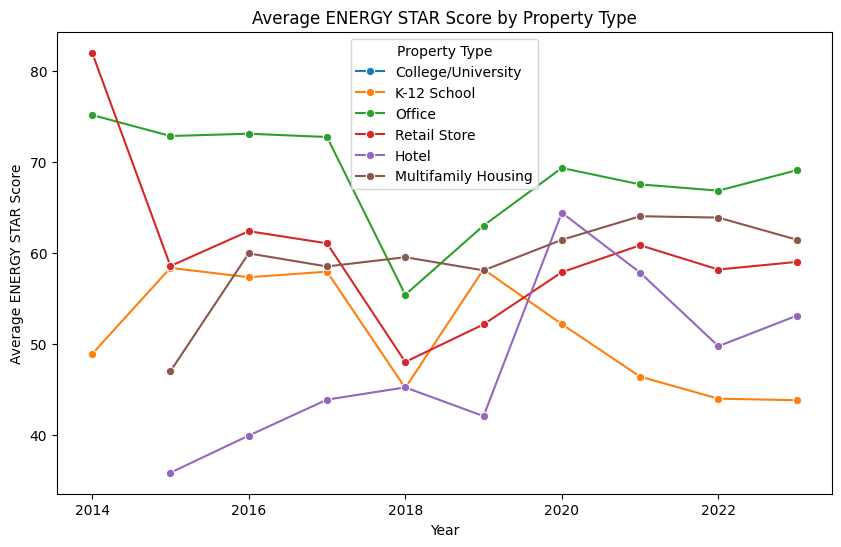

In [9]:
top_types = energy_df["Primary Property Type"].value_counts().nlargest(6).index

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="ENERGY STAR Score",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average ENERGY STAR Score by Property Type")
plt.ylabel("Average ENERGY STAR Score")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

In [10]:
college_trends = efficiency_trends[
    efficiency_trends["Primary Property Type"] == "College/University"
][
    [
        "Data Year",
        "ENERGY STAR Score",
        "Site EUI (kBtu/sq ft)",
        "Source EUI (kBtu/sq ft)",
    ]
]

college_trends.sort_values("Data Year")

,Data Year,ENERGY STAR Score,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft)
3,2014,NaN,126.944444,240.777778
26,2015,NaN,112.267500,228.455000
74,2016,NaN,112.306897,228.447126
122,2017,NaN,103.682051,210.433333
169,2018,NaN,287.683673,386.523469
216,2019,NaN,425.019355,562.372222
262,2020,NaN,202.070093,277.332710
310,2021,NaN,242.744330,332.274227
358,2022,NaN,108.240299,192.380597
407,2023,NaN,90.909524,167.465476


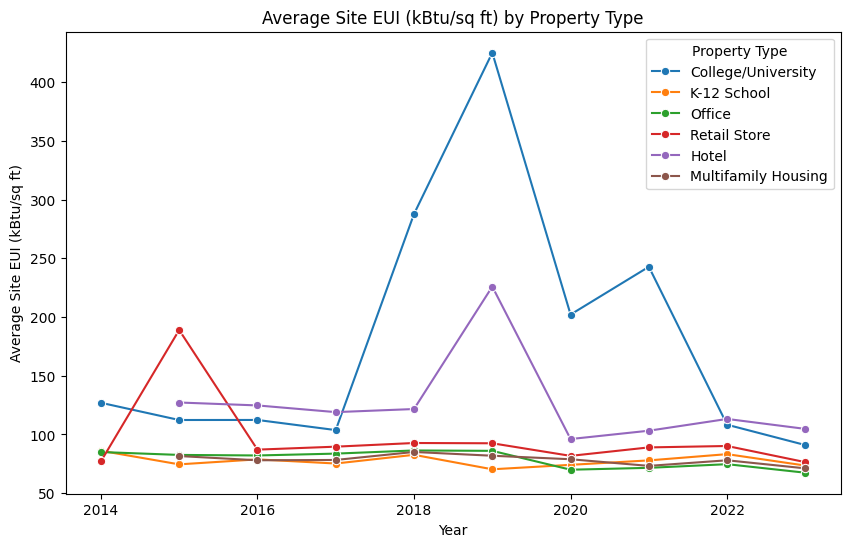

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="Site EUI (kBtu/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average Site EUI (kBtu/sq ft) by Property Type")
plt.ylabel("Average Site EUI (kBtu/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

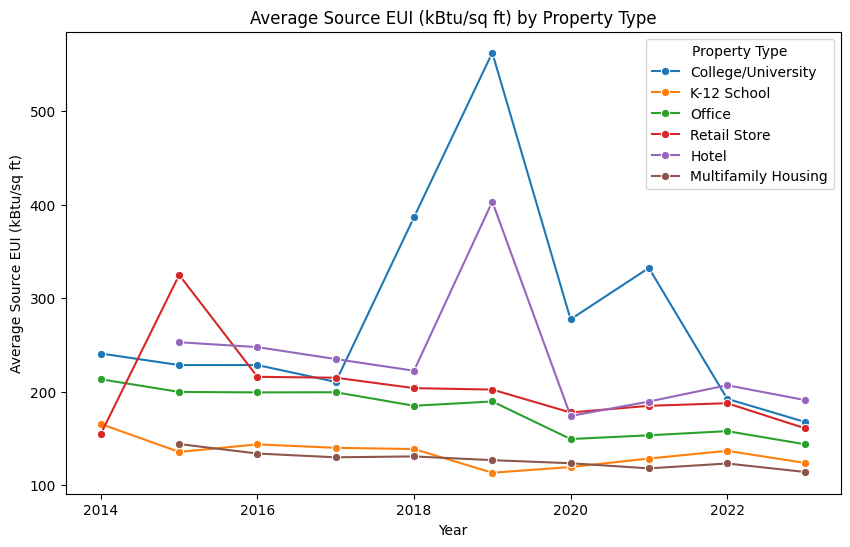

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="Source EUI (kBtu/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average Source EUI (kBtu/sq ft) by Property Type")
plt.ylabel("Average Source EUI (kBtu/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

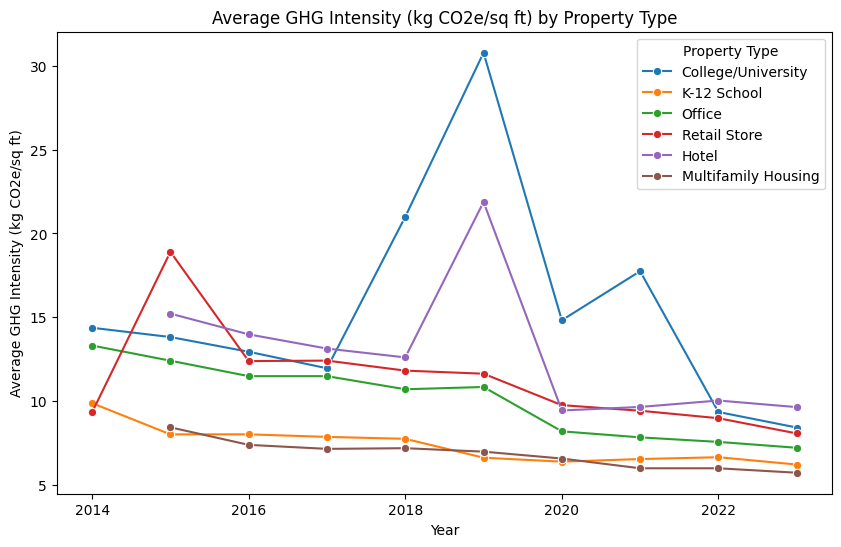

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="GHG Intensity (kg CO2e/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average GHG Intensity (kg CO2e/sq ft) by Property Type")
plt.ylabel("Average GHG Intensity (kg CO2e/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

### Conclusions

We generally see improvements in efficiency over time. One interesting thing to note is the spike in 2019 for `College/University` and `Hotel` which is likely due to COVID-19. We also see a smaller spike in 2015 for `Retail Store` which could be worth looking into.

For further analyses, it may be worth it to exclude `College/University` and `Hotel` from year to year analyses as the outlier of Covid could skew our results.